<AxesSubplot:xlabel='time'>

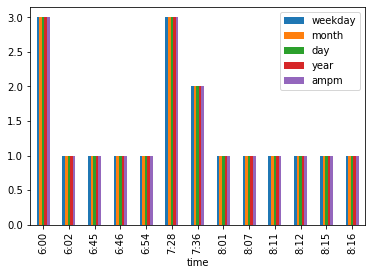

In [33]:
import codecs
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

file_address = "E:/Users/Jakub/Pictures/Stuff/fbdata/messages/5.html"

f = codecs.open(file_address, 'r', "utf-8")
messages = f.read()
source = BeautifulSoup(messages, features = "html.parser")
divs = source.find_all("div", attrs={"message_header"})
list_div = []
for div in divs:
    list_div.append((str(div.find_all("span", attrs={"meta"})[0])[19:]))


clean_list = []
weekday = []
month = []
day = []
year = []
time = []
ampm = []
list_df = [weekday, month, day, year, time, ampm]


for div in list_div:
    clean_div = re.search("(\w+'\w+), (\w+-\w+)! (\d+), (\d+) roundabouts (\d+:\d+)in the (\w+)" ,div)
    weekday.append(clean_div.group(1))
    month.append(clean_div.group(2))
    day.append(clean_div.group(3))
    year.append(clean_div.group(4))
    time.append(clean_div.group(5))
    ampm.append(clean_div.group(6))
    clean_list.append(clean_div.group(1,2,3,4,5,6))
# 
df = pd.DataFrame(list(zip(weekday, month, day, year, time, ampm)), columns = ["weekday", "month", "day", "year", "time", "ampm"])
df.groupby(["time"]).count().plot(kind='bar')

#regex až bude hotové = (\w+), (\w+? \d+), (\d+) \w+ (\d+:\d+)in the (\w+)
#regex_ted = (\w+'\w+), (\w+-\w+)! (\d+), (\d+) roundabouts (\d+:\d+)in the (\w+)

In [29]:

list_div

["Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:22in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:19in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:19in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:19in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:19in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:18in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:18in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:16in the mornin' UTC+02</span>",
 "Tew's Day, Merry Month o' June 28, 2016 roundabouts 6:16in the mornin' UTC+02</span>",
 "Day o' the Moon, Merry Month o' June 27, 2016 roundabouts 6:58in the evenin' UTC+02</span>",
 "Day o' the Moon, Merry Month o' June 27, 2016 roundabouts 6:55in the evenin' UTC+02</span>",
 "Day o' 